# <h1><span style="color:crimson;"><center>**Fast,Furious and Insured:Machine Learning Challenge**</center></span></h1>

**Vehicle insurance** is insurance for cars, trucks, motorcycles, and other road vehicles. Its main purpose is to provide financial protection against:

* Physical damage or bodily injury caused by traffic collisions
* Liability that could arise from incidents in a vehicle

Vehicle insurance may additionally offer financial protection against theft of the vehicle and against damage to the vehicle sustained because of events other than traffic collisions such as keying, weather or natural disasters, and damage sustained by colliding with stationary objects.

# **Task**

* Condition: Predict if the vehicle provided in the image is damaged or not
* Amount: Based on the condition of a vehicle, predict the insurance amount of the cars that are provided in the dataset

# Load Packages

In [3]:
import pandas as pd
import numpy as np
import glob
import os
import cv2
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder
# import xgboost as xgb
# import warnings
# warnings.filterwarnings('ignore')

# EDA

In [5]:
#Train Data
df=pd.read_csv("data/Fast_Furious_Insured/train.csv")
df.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,img_4513976.jpg,BQ,41500.0,1037.5,2026-12-03,36142.68,0,0.0
1,img_7764995.jpg,BQ,50700.0,1267.5,2025-07-10,12753.00,1,6194.0
2,img_451308.jpg,A,49500.0,1237.5,2022-08-11,43102.68,0,0.0
3,img_7768372.jpg,A,33500.0,837.5,2022-08-02,8453.00,1,7699.0
4,img_7765274.jpg,AC,27600.0,690.0,2026-05-01,6978.00,1,8849.0


In [7]:
#Test Data
df_t=pd.read_csv("data/Fast_Furious_Insured/test.csv")
df_t.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage
0,img_4538519.jpg,B,23600,590.0,2025-04-12,5978.0
1,img_7766002.jpg,C,28300,707.5,2028-08-24,7153.0
2,img_4637390.jpg,AC,43700,1092.5,2023-11-28,11003.0
3,img_4516108.jpg,BB,46100,1152.5,2028-02-04,11603.0
4,img_4517008.jpg,BB,40700,1017.5,2022-01-03,10253.0


In [8]:
df.shape

(1399, 8)

In [9]:
df.isnull().sum()

Image_path            0
Insurance_company     0
Cost_of_vehicle      89
Min_coverage         89
Expiry_date           0
Max_coverage         89
Condition             0
Amount               11
dtype: int64

In [10]:
df.nunique()

Image_path           1399
Insurance_company      11
Cost_of_vehicle       307
Min_coverage          307
Expiry_date          1063
Max_coverage          389
Condition               2
Amount               1186
dtype: int64

In [11]:
df.dtypes

Image_path            object
Insurance_company     object
Cost_of_vehicle      float64
Min_coverage         float64
Expiry_date           object
Max_coverage         float64
Condition              int64
Amount               float64
dtype: object

# Predict the condition of the cars

In [12]:
#Create a new dataset
img_df = pd.DataFrame()
img_df["Image_Path"]="../input/fast-furious-and-insured/Fast_Furious_Insured/trainImages/" + df["Image_path"]
img_df["Condition"]=df["Condition"]
img_df.head(6)

,Image_Path,Condition
0,../input/fast-furious-and-insured/Fast_Furious...,0
1,../input/fast-furious-and-insured/Fast_Furious...,1
2,../input/fast-furious-and-insured/Fast_Furious...,0
3,../input/fast-furious-and-insured/Fast_Furious...,1
4,../input/fast-furious-and-insured/Fast_Furious...,1
5,../input/fast-furious-and-insured/Fast_Furious...,1


In [13]:
#Data type change
img_df = img_df.astype({'Condition': str})
img_df.dtypes

Image_Path    object
Condition     object
dtype: object

TypeError: Image data of dtype object cannot be converted to float

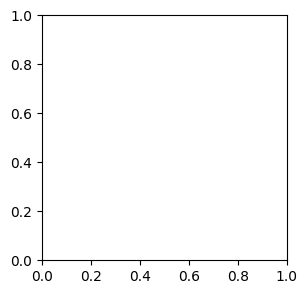

In [14]:
fig = plt.figure(figsize=(20, 7))

rows = 2
columns = 3

Image1 = cv2.imread((img_df['Image_Path'][0]))
Image2 = cv2.imread(img_df['Image_Path'][1])
Image3 = cv2.imread(img_df['Image_Path'][2])
Image4 = cv2.imread(img_df['Image_Path'][3])
Image5 = cv2.imread(img_df['Image_Path'][4])
Image6 = cv2.imread(img_df['Image_Path'][5])

fig.add_subplot(rows, columns, 1)

plt.imshow(Image1)
plt.axis('off')
plt.title(img_df['Condition'][0])
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title(img_df['Condition'][1])
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title(img_df['Condition'][2])
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title(img_df['Condition'][3])

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 5)
  
# showing image
plt.imshow(Image5)
plt.axis('off')
plt.title(img_df['Condition'][4])

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 6)
  
# showing image
plt.imshow(Image6)
plt.axis('off')
plt.title(img_df['Condition'][5])

In [16]:
#Split the image dataset into two parts
from sklearn.model_selection import train_test_split
train,  test = train_test_split(img_df, test_size = 0.25, random_state = 32)
print(f"train set shape: {train.shape}")
print(f"validation set shape: {test.shape}")

train set shape: (1049, 2)
validation set shape: (350, 2)


In [17]:
#Training model
model = Sequential()   ## creating a blank model
model.add(Conv2D(3,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(3,(3,3),activation='relu'))
model.add(Conv2D(3,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(6,(3,3),activation='relu'))
model.add(Conv2D(6,(3,3),activation='relu'))
model.add(Conv2D(6,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(9,(3,3),activation='relu'))
model.add(Conv2D(9,(3,3),activation='relu'))
model.add(Conv2D(9,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(12,(3,3),activation='relu'))
model.add(Conv2D(12,(3,3),activation='relu'))
model.add(Conv2D(12,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(16,(3,3),activation='relu'))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32,(3,3),activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2), padding = "same"))


model.add(Flatten())    ### input layer
model.add(Dense(128,activation='relu')) 
model.add(Dense(100,activation='relu'))    # hidden layer of ann
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))   ## output layer

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 3)       84        
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 3)       84        
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 3)       84        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 3)      0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 107, 107, 6)       168       
                                                                 
 conv2d_4 (Conv2D)           (None, 105, 105, 6)       330       
                                                        

In [19]:
#Data Augmentation
train_datagen = image.ImageDataGenerator(rescale = 1./255,rotation_range=30,width_shift_range=(-20,20), height_shift_range=(-20,20),shear_range = 0.4,zoom_range = (0.1,0.6), horizontal_flip = True,vertical_flip=True,channel_shift_range=0.3,fill_mode='nearest')

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [20]:
#Reshaping test and validation images 
train_generator = train_datagen.flow_from_dataframe(
    dataframe = train,
    x_col = 'Image_Path', 
    y_col ='Condition',
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'binary',
    shuffle = True)
validation_generator = test_dataset.flow_from_dataframe(
    dataframe = test,
    x_col = 'Image_Path', 
    y_col ='Condition',
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'binary',
    shuffle = True)

Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.


c:\Users\moria\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\preprocessing\image.py:1137: UserWarning: Found 1049 invalid image filename(s) in x_col="Image_Path". These filename(s) will be ignored.
  warnings.warn(
c:\Users\moria\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\preprocessing\image.py:1137: UserWarning: Found 350 invalid image filename(s) in x_col="Image_Path". These filename(s) will be ignored.
  warnings.warn(


In [24]:
history = model.fit(train_generator,epochs = 15,validation_data = validation_generator)

ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [23]:
#Graph
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 15
epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history' is not defined

In [ ]:
model.evaluate_generator(validation_generator)

In [ ]:
#Test dataset
test_datagen = image.ImageDataGenerator(rescale = 1.0/255.)
dir = "../input/fast-furious-and-insured/Fast_Furious_Insured/testImages" 
test_generator = test_datagen.flow_from_dataframe(directory = dir, dataframe = df_t, target_size = (224,224),
                                            x_col = 'Image_path', y_col = None,
                                             batch_size = 64,class_mode = None)

In [ ]:
#Prediction
preds = (model.predict(test_generator)>0.5).astype("int32")
preds

In [ ]:
np.shape(preds)

In [ ]:
df_t['Condition'] = pd.DataFrame(preds)

In [ ]:
df_t.head()

# Predict the insurance amount of cars

In [ ]:
df.head()

In [ ]:
#Get the null rows
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

In [ ]:
rows_with_NaN

In [ ]:
df['Insurance_company'].unique()

In [ ]:
df['Insurance_company'].value_counts()

*Different insurance company will have different values of minimum and maximum coverage.*
**Fill the missing values**.

In [ ]:
sum1 =0
sum2 =0
sum3=0
sum4=0
sum5=0
sum6=0
sum7=0
sum8=0
sum9=0
sum10=0
sum11=0
for i in range(0,len(df)):
    if (pd.isnull(df['Cost_of_vehicle'][i])== False):
        if (df['Insurance_company'][i] == "BQ"):
            sum1 = sum1 + df['Cost_of_vehicle'][i]
        elif (df['Insurance_company'][i] == "A"):
            sum2 = sum2 + df['Cost_of_vehicle'][i]
        elif (df['Insurance_company'][i] == "AC"):
            sum3 = sum3 + df['Cost_of_vehicle'][i]
        elif (df['Insurance_company'][i] == "BC"):
             sum4 = sum4 + df['Cost_of_vehicle'][i]
        elif (df['Insurance_company'][i] == "DA"):
               sum5 = sum5 + df['Cost_of_vehicle'][i]
        elif (df['Insurance_company'][i] == "BB"):
                 sum6 = sum6 + df['Cost_of_vehicle'][i]
        elif (df['Insurance_company'][i] == "C"):
                   sum7 = sum7 + df['Cost_of_vehicle'][i]
        elif (df['Insurance_company'][i] == "O"):
                     sum8 = sum8 + df['Cost_of_vehicle'][i]
        elif (df['Insurance_company'][i] == "B"):
                       sum9 = sum9 + df['Cost_of_vehicle'][i]
        elif (df['Insurance_company'][i] == "AA"):
                         sum10 = sum10 + df['Cost_of_vehicle'][i]
        else:
                           sum11 = sum11 + df['Cost_of_vehicle'][i]
    




In [ ]:
sum11

In [ ]:
for i in range(0,len(df)):
    if (pd.isnull(df['Cost_of_vehicle'][i]) == True):
        if (df['Insurance_company'][i] == "BQ"):
            p1 = sum1/131
            df['Cost_of_vehicle'][i] = p1
        elif (df['Insurance_company'][i] == "A"):
            p2 = sum2/132
            df['Cost_of_vehicle'][i] = p2
      
        elif (df['Insurance_company'][i] == "AC"):
            p3 = sum3/119
            df['Cost_of_vehicle'][i] = p3
      
        elif (df['Insurance_company'][i] == "BC"):
                p4 = sum4/121
                df['Cost_of_vehicle'][i] = p4
      
        elif (df['Insurance_company'][i] == "DA"):
            p5 = sum5/128
            df['Cost_of_vehicle'][i] = p5
      
        elif (df['Insurance_company'][i] == "BB"):
                 p6 = sum6/124
                 df['Cost_of_vehicle'][i] = p6
      
        elif (df['Insurance_company'][i] == "C"):
                p7 = sum7/131
                df['Cost_of_vehicle'][i] = p7
      
        elif (df['Insurance_company'][i] == "O"):
            p8 = sum8/126
            df['Cost_of_vehicle'][i] = p8
      
        elif (df['Insurance_company'][i] == "B"):
            p9 = sum9/148
            df['Cost_of_vehicle'][i] = p9
      
        elif (df['Insurance_company'][i] == "AA"):
                p10 = sum10/123
                df['Cost_of_vehicle'][i] = p10
      
        else:
            p11 = sum11/116
            df['Cost_of_vehicle'][i] = p11
                    

In [ ]:
sum1 =0
sum2 =0
sum3=0
sum4=0
sum5=0
sum6=0
sum7=0
sum8=0
sum9=0
sum10=0
sum11=0
s1 =0
s2 =0
s3=0
s4=0
s5=0
s6=0
s7=0
s8=0
s9=0
s10=0
s11=0
for i in range(0,len(df)):
    if (pd.isnull(df['Min_coverage'][i])== False):
        if (df['Insurance_company'][i] == "BQ"):
            sum1 = sum1 + df['Min_coverage'][i]
            s1 = s1 + df['Max_coverage'][i]
        elif (df['Insurance_company'][i] == "A"):
            sum2 = sum2 + df['Min_coverage'][i]
            s2 = s2 + df['Max_coverage'][i]
        elif (df['Insurance_company'][i] == "AC"):
                sum3 = sum3 + df['Min_coverage'][i]
                s3 = s3 + df['Max_coverage'][i]
        elif (df['Insurance_company'][i] == "BC"):
                sum4 = sum4 + df['Min_coverage'][i]
                s4 = s4 + df['Max_coverage'][i]
        elif (df['Insurance_company'][i] == "DA"):
                sum5 = sum5 + df['Min_coverage'][i]
                s5 = s5 + df['Max_coverage'][i]
        elif (df['Insurance_company'][i] == "BB"):
                 sum6 = sum6 + df['Min_coverage'][i]
                 s6 = s6 + df['Max_coverage'][i]
        elif (df['Insurance_company'][i] == "C"):
                   sum7 = sum7 + df['Min_coverage'][i]
                   s7 = s7 + df['Max_coverage'][i]
        elif (df['Insurance_company'][i] == "O"):
                     sum8 = sum8 + df['Min_coverage'][i]
                     s8 = s8 + df['Max_coverage'][i]
        elif (df['Insurance_company'][i] == "B"):
                       sum9 = sum9 + df['Min_coverage'][i]
                       s9 = s9 + df['Max_coverage'][i]
        elif (df['Insurance_company'][i] == "AA"):
                         sum10 = sum10 + df['Min_coverage'][i]
                         s10 = s10 + df['Max_coverage'][i]
        else:
                           sum11 = sum11 + df['Min_coverage'][i]
                           s11 = s11 + df['Max_coverage'][i]
    




In [ ]:
s1

In [ ]:
sum1

In [ ]:
for i in range(0,len(df)):
    if (pd.isnull(df['Min_coverage'][i]) == True):
        if (df['Insurance_company'][i] == "BQ"):
            p1 = sum1/131
            m1 = s1/131
            df['Min_coverage'][i] = p1
            df['Max_coverage'][i] = m1
        elif (df['Insurance_company'][i] == "A"):
            p2 = sum2/132
            m2 = s2/132
            df['Min_coverage'][i] = p2
            df['Max_coverage'][i] = m2
      
        elif (df['Insurance_company'][i] == "AC"):
            p3 = sum3/119
            m3 = s3/119
            df['Min_coverage'][i] = p3
            df['Max_coverage'][i] = m3
      
        elif (df['Insurance_company'][i] == "BC"):
            p4 = sum4/121
            m4 = s4/121
            df['Min_coverage'][i] = p4
            df['Max_coverage'][i] = m4
      
        elif (df['Insurance_company'][i] == "DA"):
            p5 = sum5/128
            m5 = s5/128
            df['Min_coverage'][i] = p5
            df['Max_coverage'][i] = m5
      
        elif (df['Insurance_company'][i] == "BB"):
            p6 = sum6/124
            m6 = s6/124
            df['Min_coverage'][i] = p6
            df['Max_coverage'][i] = m6
      
        elif (df['Insurance_company'][i] == "C"):
            p7 = sum7/131
            m7 = s7/131
            df['Min_coverage'][i] = p7
            df['Max_coverage'][i] = m7
      
        elif (df['Insurance_company'][i] == "O"):
            p8 = sum8/126
            m8 = s8/126
            df['Min_coverage'][i] = p8
            df['Max_coverage'][i] = m8
      
        elif (df['Insurance_company'][i] == "B"):
            p9 = sum9/148
            m9 = s9/148
            df['Min_coverage'][i] = p9
            df['Max_coverage'][i] = m9
      
        elif (df['Insurance_company'][i] == "AA"):
            p10 = sum10/123
            m10 = s10/123
            df['Min_coverage'][i] = p10
            df['Max_coverage'][i] = m10
      
        else:
            p11 = sum11/116
            m11 = s11/116
            df['Min_coverage'][i] = p11
            df['Max_coverage'][i] = m11
                    

In [ ]:
df['Amount'].fillna(value = (df['Amount'].mean()),inplace = True)

In [ ]:
btype = df["Expiry_date"].str.split("-",expand = True)
df["Year"]=btype[0]
df["Month"]=btype[1]
df["Day"]=btype[2]

In [ ]:
df=df.drop(columns=['Expiry_date'])
df.head()

***Data Visualization***

In [ ]:
g=sb.distplot(np.log1p(df['Amount']),color="Purple")

In [ ]:
plt.figure(figsize=(20,10 ))
sb.boxplot(x="Insurance_company", y="Min_coverage", data=df)
plt.show()

In [ ]:
plt.figure(figsize=(20,10 ))
sb.boxplot(x="Insurance_company", y="Max_coverage", data=df)
plt.show()

In [ ]:
plt.figure(figsize=(20,10 ))
sb.boxplot(x="Insurance_company", y="Cost_of_vehicle", data=df)
plt.show()

In [ ]:
plt.figure(figsize=(10,10 ))
sb.jointplot(x='Max_coverage',y='Min_coverage',data=df,color = 'red')
plt.show()

In [ ]:
plt.figure(figsize=(40,40 ))
sb.pairplot(df,hue='Insurance_company',diag_kind="kde",kind="scatter",palette="husl")
plt.show()

In [ ]:
#Remove outliers
df.loc[df['Max_coverage']>20000,'Max_coverage'] = np.mean(df['Max_coverage'])

In [ ]:
df = df.astype({'Year':'int64','Month':'int64','Day':'int64'})

In [ ]:
df.drop('Image_path', axis=1, inplace=True)

**Test Dataset Analysis**

In [ ]:
df_t.head()

In [ ]:
df_t.isnull().sum()

In [ ]:
ctype = df_t["Expiry_date"].str.split("-",expand = True)
df_t["Year"]=ctype[0]
df_t["Month"]=ctype[1]
df_t["Day"]=ctype[2]

In [ ]:
df_t = df_t.astype({'Year':'int64','Month':'int64','Day':'int64'})

In [ ]:
sol = df_t['Image_path']
df_t.drop('Image_path', axis=1, inplace=True)

In [ ]:
df_t=df_t.drop(columns=['Expiry_date'])
df_t.head()

**Label Encoder**

In [ ]:
l= LabelEncoder()   
df['Insurance_company'] = l.fit_transform(df['Insurance_company'])
df_t['Insurance_company'] = l.fit_transform(df_t['Insurance_company'])

In [ ]:
Y_train = df['Amount']
X_train = df.drop('Amount',1)
X_test = df_t

In [ ]:
X_train.info()

In [ ]:
Y_train.head()

In [ ]:
Y_train.isnull().sum()

In [ ]:
X_train.shape

In [ ]:
Y_train.shape

# Model

In [ ]:
#split the dataset
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 123)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

In [ ]:
#xgboost 
import xgboost as xgb

param = {"booster":"gblinear", "objective":"reg:squarederror","eval_metric":"rmse"}

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

bst = xgb.train(params=param, dtrain = d_train, num_boost_round = 10)

In [ ]:
d_test = xgb.DMatrix(X_test)
p_test = bst.predict(d_test)

In [ ]:
X_train.head()

In [ ]:
solution = pd.DataFrame(p_test, columns = ['Amount'])

In [ ]:
solution.head(10)

In [ ]:
sol = pd.read_csv('../input/fast-furious-and-insured/Fast_Furious_Insured/test.csv')
solution['Image_path'] = sol['Image_path']
solution['Condition'] = df_t['Condition']

In [ ]:
solution.head()

In [ ]:
#rearrange the columns 
column_names = ["Image_path", "Condition", "Amount"]

solution = solution.reindex(columns=column_names)
solution.head()

**NOTE:-** While using XGBoost model,please make sure that target column don't have any NAN values.

In [ ]:
#Download the .csv file in Google colab
from google.colab import files
files.download('solution.csv')

# <center><span style="color:crimson;">Please upvote it, if you find it useful.</span></center>